In [1]:
import EEGAnalysis as ea
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import os, re
from tqdm import tqdm
from sklearn.decomposition import PCA

In [2]:
_behavior = pd.read_csv('../Step_3_Behavior_Stat/zhouchen-behavior-final.csv', dtype={'date':'str'})
check_behavior_prediction = lambda x,y,z: _behavior.time[(_behavior.paradigm == x) & (_behavior['date'] == y)].values < z
_behavior[(_behavior.paradigm=='1-10') & (_behavior.date=='180901')].head(3)

,date,paradigm,time,trial
60,180901,1-10,0.32,1
61,180901,1-10,-0.36,2
62,180901,1-10,0.12,3


In [3]:
_raw = h5py.File('zhouchen-10-delta.h5', 'r')

In [4]:
_dates = list(_raw.keys())

In [31]:

_prediction = check_behavior_prediction('1-5', '180827', 0)
_batch_itpc_with = np.zeros((0, 12000))
_batch_itpc_without = np.zeros((0, 12000))
for chidx in tqdm(range(110)):
    _itpc = ea.decomposition.dwt_itpc([_raw['180827']['1']['%03d'%chidx][_prediction,:]])[0]
    _batch_itpc_with = np.vstack((_batch_itpc_with, _itpc))
    
    _itpc = ea.decomposition.dwt_itpc([_raw['180827']['1']['%03d'%chidx][~_prediction,:]])[0]
    _batch_itpc_without = np.vstack((_batch_itpc_without, _itpc))

100%|██████████| 110/110 [00:29<00:00,  2.63it/s]


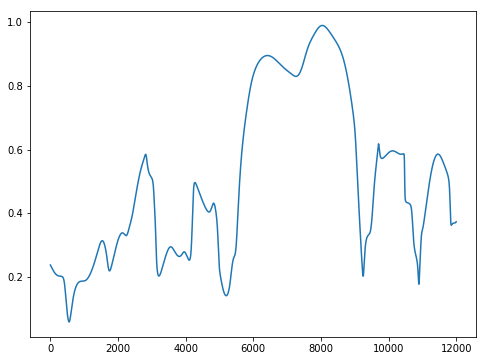

In [14]:
plt.figure(figsize=(8,6))
# plt.imshow(np.angle(np.array(_raw['180827']['1']['009'])), aspect='auto')
plt.plot(_itpc)

In [40]:
pca = PCA(n_components=2).fit_transform(np.vstack((_batch_itpc_with, _batch_itpc_without)))
pca = pca.reshape((2, -1, 2))

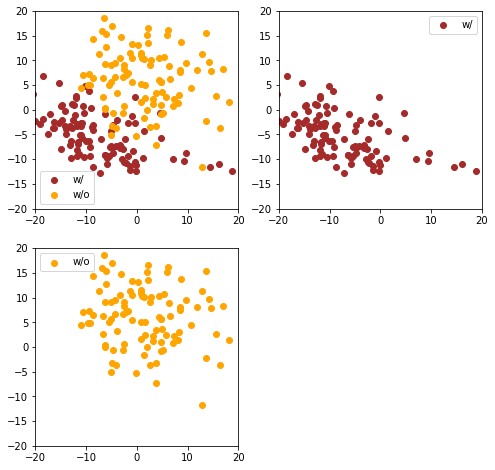

In [70]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.scatter(pca[0,:,0], pca[0,:,1], c='brown', label='w/')
plt.scatter(pca[1,:,0], pca[1,:,1], c='orange', label='w/o')
plt.xlim((-20, 20))
plt.ylim((-20, 20))
plt.legend()

plt.subplot(2,2,2)
plt.scatter(pca[0,:,0], pca[0,:,1], c='brown', label='w/')
plt.xlim((-20, 20))
plt.ylim((-20, 20))
plt.legend()

plt.subplot(2,2,3)
plt.scatter(pca[1,:,0], pca[1,:,1], c='orange', label='w/o')
plt.xlim((-20, 20))
plt.ylim((-20, 20))
plt.legend()

plt.show()
# plt.scatter(pca[~_prediction,0], pca[~_prediction,1])

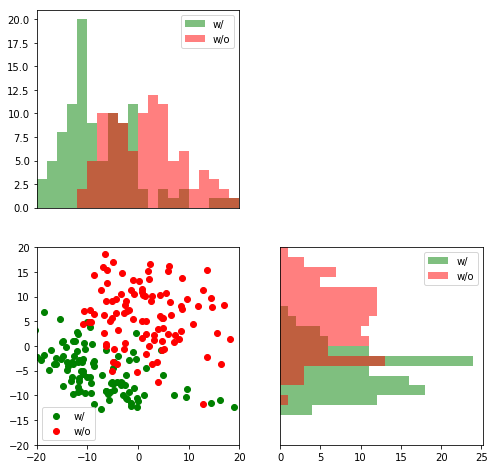

In [77]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
hi_w, x = np.histogram(pca[0,:,0], range=(-20, 20), bins=20)
hi_wo, x = np.histogram(pca[1,:,0], range=(-20, 20), bins=20)
plt.bar(x[:-1]+1, hi_w, alpha=0.5, width=2, color='g', label='w/')
plt.bar(x[:-1]+1, hi_wo, alpha=0.5, width=2, color='r', label='w/o')
plt.xlim((-20, 20))
plt.xticks([])
# plt.ylim((-20, 20))
plt.legend()

plt.subplot(2,2,3)
plt.scatter(pca[0,:,0], pca[0,:,1], color='g', label='w/')
plt.scatter(pca[1,:,0], pca[1,:,1], color='r', label='w/o')
plt.xlim((-20, 20))
plt.ylim((-20, 20))
plt.legend()

plt.subplot(2,2,4)
hi_w, x = np.histogram(pca[0,:,1], range=(-20, 20), bins=20)
hi_wo, x = np.histogram(pca[1,:,1], range=(-20, 20), bins=20)
plt.barh(x[:-1]+1, hi_w, alpha=0.5, height=2, color='g', label='w/')
plt.barh(x[:-1]+1, hi_wo, alpha=0.5, height=2, color='r', label='w/o')
# plt.xlim((-20, 20))
plt.ylim((-20, 20))
plt.yticks([])
plt.legend()




plt.show()
# plt.scatter(pca[~_prediction,0], pca[~_prediction,1])

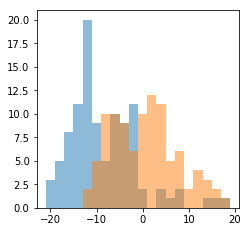

In [68]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,3)

hi_w, x = np.histogram(pca[0,:,0], range=(-20, 20), bins=20)
hi_wo, x = np.histogram(pca[1,:,0], range=(-20, 20), bins=20)

plt.bar(x[:-1], hi_w, alpha=0.5, width=2)
plt.bar(x[:-1], hi_wo, alpha=0.5, width=2)

plt.show()

---

In [49]:
_raw = h5py.File('zhouchen-10-delta.h5', 'r')

_dates = list(_raw.keys())

In [ ]:
chidx = 9


for _idate in _dates:
    np.log10(np.abs(np.array(_raw[_idate]['1']['%03d'%chidx])))

In [51]:
_raw.close()